# Step 3
The code in this notebook uses some support functions defined in the file `../support.js` in the root of this repository.

## 1 Label Detection
First up let's use Rekognition to figure out what it thinks an image contains. This process is called label detection. In the code below we will ask Rekognition to find a maximum of ten labels in the image and only return labels that it has a greater than 80% confidence in.

![Eric the Cat](../data/images/cat-pet-animal-domestic-104827.jpeg "Eric")

In [1]:
// load the AWS SDK
AWS = require('aws-sdk')
support = require('../support')

// create a Rekogntion object to call
rek = new AWS.Rekognition()

// configure parameters
imageParams = {
  Image: {
    S3Object: {
      Bucket: process.env.MY_BUCKET_NAME,
      Name: 'images/cat-pet-animal-domestic-104827.jpeg'
    }
  },
  MaxLabels: 10,
  MinConfidence: 80
}

// call Rekognition
rek.detectLabels(imageParams, (err, data) => {
  console.log(data)              // print raw results
  support.printRekResults(data)  // print formatted results
})
$$.clear()

{
  Labels: [
    {
      Name: 'Cat',
      Confidence: 92.20275115966797,
      Instances: [Array],
      Parents: [Array]
    },
    {
      Name: 'Animal',
      Confidence: 92.20275115966797,
      Instances: [],
      Parents: []
    },
    {
      Name: 'Pet',
      Confidence: 92.20275115966797,
      Instances: [],
      Parents: [Array]
    },
    {
      Name: 'Mammal',
      Confidence: 92.20275115966797,
      Instances: [],
      Parents: [Array]
    },
    {
      Name: 'Abyssinian',
      Confidence: 89.86946105957031,
      Instances: [],
      Parents: [Array]
    },
    {
      Name: 'Manx',
      Confidence: 85.65826416015625,
      Instances: [],
      Parents: [Array]
    }
  ],
  LabelModelVersion: '2.0'
}

name: Cat, confidence: 92.20275115966797
name: Animal, confidence: 92.20275115966797
name: Pet, confidence: 92.20275115966797
name: Mammal, confidence: 92.20275115966797
name: Abyssinian, confidence: 89.86946105957031
name: Manx, confidence: 85.65826416015625


The call to rekogntion returns JSON formatted data, we have provided an additional support fuction that formats the output. Notice that each label comes with an associated confidence level (a number between 0 and 100). It is important when using AI services that you interpret this confidence level. For example it is usually not a good idea to classify an image with a less than 90% confidence level. This does of course depend on the business context.


## 2 Face Detection
Here is a picture of some happy go getting executives at a business meeting!

![Meeting](../data/images/Business_Meeting.jpg "Meeting")

AWS Rekognition has built in facial recognition capabilities. The code below wil feed this image to Rekognition and ask it to detect faces in the image.

{
  FaceDetails: [
    {
      BoundingBox: [Object],
      Landmarks: [Array],
      Pose: [Object],
      Quality: [Object],
      Confidence: 99.99889373779297
    },
    {
      BoundingBox: [Object],
      Landmarks: [Array],
      Pose: [Object],
      Quality: [Object],
      Confidence: 99.99858093261719
    },
    {
      BoundingBox: [Object],
      Landmarks: [Array],
      Pose: [Object],
      Quality: [Object],
      Confidence: 99.99467468261719
    },
    {
      BoundingBox: [Object],
      Landmarks: [Array],
      Pose: [Object],
      Quality: [Object],
      Confidence: 99.99893951416016
    },
    {
      BoundingBox: [Object],
      Landmarks: [Array],
      Pose: [Object],
      Quality: [Object],
      Confidence: 98.72677612304688
    }
  ]
}

rect x=463.70909214019775, y=142.10972785949707, w=69.169861972332, h=87.09498718380928
rect x=76.99491918087006, y=115.48943817615509, w=65.88091924786568, h=87.53277361392975
rect x=304.1236197948456, y=34.487122669816

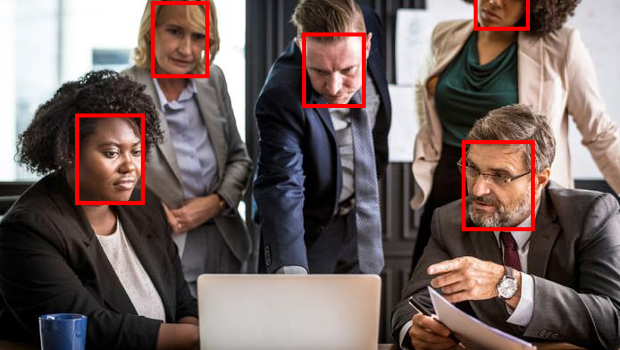

In [2]:
// load the AWS SDK
AWS = require('aws-sdk')
support = require('../support')

// create a Rekogntion object to call
rek = new AWS.Rekognition()

// configure parameters
imageParams = {
  Image: {
    S3Object: {
      Bucket: process.env.MY_BUCKET_NAME,
      Name: 'images/Business_Meeting.jpg'
    }
  }
}

// call the detect faces API
rek.detectFaces(imageParams, (err, data) => {
  console.log(data)  // output the raw JSON
  support.boxImage(data.FaceDetails, '../data/images/Business_Meeting.jpg', '../data/images/Business_Meeting_boxed.png', err => {
    // draw the boxed image
    $$.png(require('fs').readFileSync('../data/images/Business_Meeting_boxed.png').toString('base64'));
  })
})
$$.clear()

In the example, we have used some supporting code to draw rectangles over the image based on the results returned by Rekognition. This is in the function `boxImage` in `support.js` in the root of this repository.


# Celebrity Detection
Rekognition also has build in APIs for detecting celebreties. The image below was take at the 2007 Oscars.

![Celebs](../data/images/2007_iconic_acting_lewis_Cotillard_Swinton_Bardem.jpg "Celebs")

Now it's your turn to try calling Rekognition. Following the pattern from the last two examples, configure the parameters and figure out the API to call. We have provided you with a function `boxCelebs` in the support library that will draw boxes around the faces as before, see if you can get the sample below to work. The documentation for the Rekognition API can be found here: https://docs.aws.amazon.com/AWSJavaScriptSDK/latest/AWS/Rekognition.html


rect x=873.9999912977219, y=146.99999928474426, w=147.0000019222498, h=146.99999928474426
rect x=221.99999579787254, y=131.000004529953, w=131.99999541044235, h=132.00000596046448
rect x=742.000034570694, y=153.99999523162842, w=126.99999968707561, h=126.9999988079071



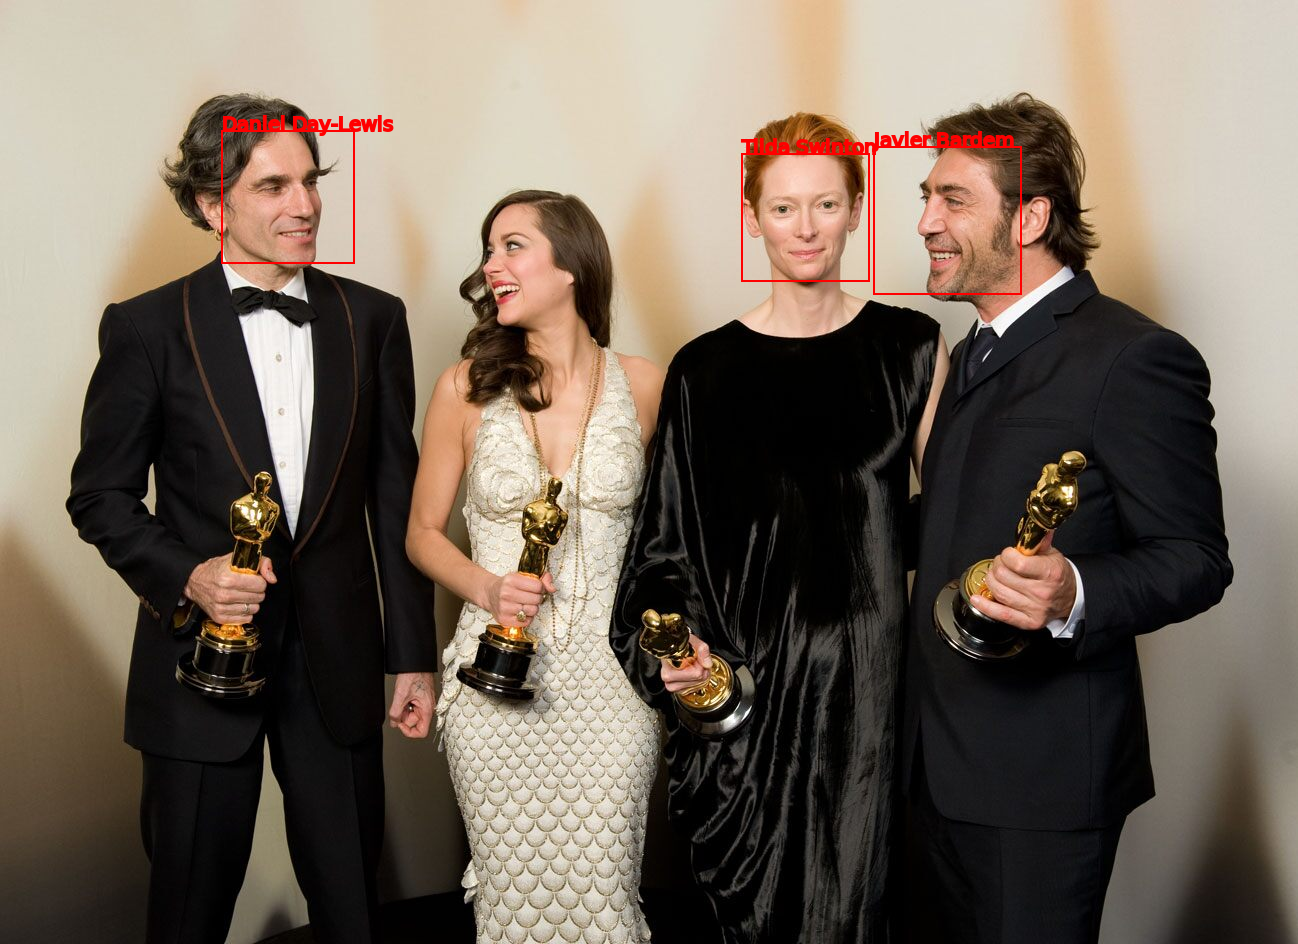

In [3]:
// load the AWS SDK
AWS = require('aws-sdk')
support = require('../support')

// create a Rekogntion object to call
rek = new AWS.Rekognition()

// configure parameters
imageParams = {
  Image: {
    S3Object: {
      Bucket: process.env.MY_BUCKET_NAME,
      Name: 'images/2007_iconic_acting_lewis_Cotillard_Swinton_Bardem.jpg'
    }
  },
}


// TODO: fill in the rekognition API to detect celebrties (imageParams, (err, data) => {
/*  support.boxCelebs(data.CelebrityFaces, '../data/images/2007_iconic_acting_lewis_Cotillard_Swinton_Bardem.jpg', '../data/images/celebs_boxed.png', err => {
    $$.png(require('fs').readFileSync('../data/images/celebs_boxed.png').toString('base64'));
  })
})
*/

rek.recognizeCelebrities(imageParams, (err, data) => {
  support.boxCelebs(data.CelebrityFaces, '../data/images/2007_iconic_acting_lewis_Cotillard_Swinton_Bardem.jpg', '../data/images/celebs_boxed.png', err => {
    $$.png(require('fs').readFileSync('../data/images/celebs_boxed.png').toString('base64'));
  })
})

$$.clear()

# Face Comparison
Rekogntion also provides the abiltity to seach for faces within images. This is a powerful capability. Below we have two images. One of Patrick Stewart as Captian Jean Luc Picard and aother with him hanging out with his celebrity buddies at an awards ceremony.

<img src='../data/images/picard.jpg' width='300'>&nbsp;&nbsp;<img src='../data/images/Sci-Tech-Oscars-group-photo.jpg' width='600'>

We will use Reckognition to see if we can detect Patrick at the awards ceremony given the picture of him in Star Treck. As before see if you can plug in the correct API from the Rekconition documentation which can be found here: https://docs.aws.amazon.com/AWSJavaScriptSDK/latest/AWS/Rekognition.html


rect x=707.8311653137207, y=464.2565417289734, w=45.46807886660099, h=61.01281598210335



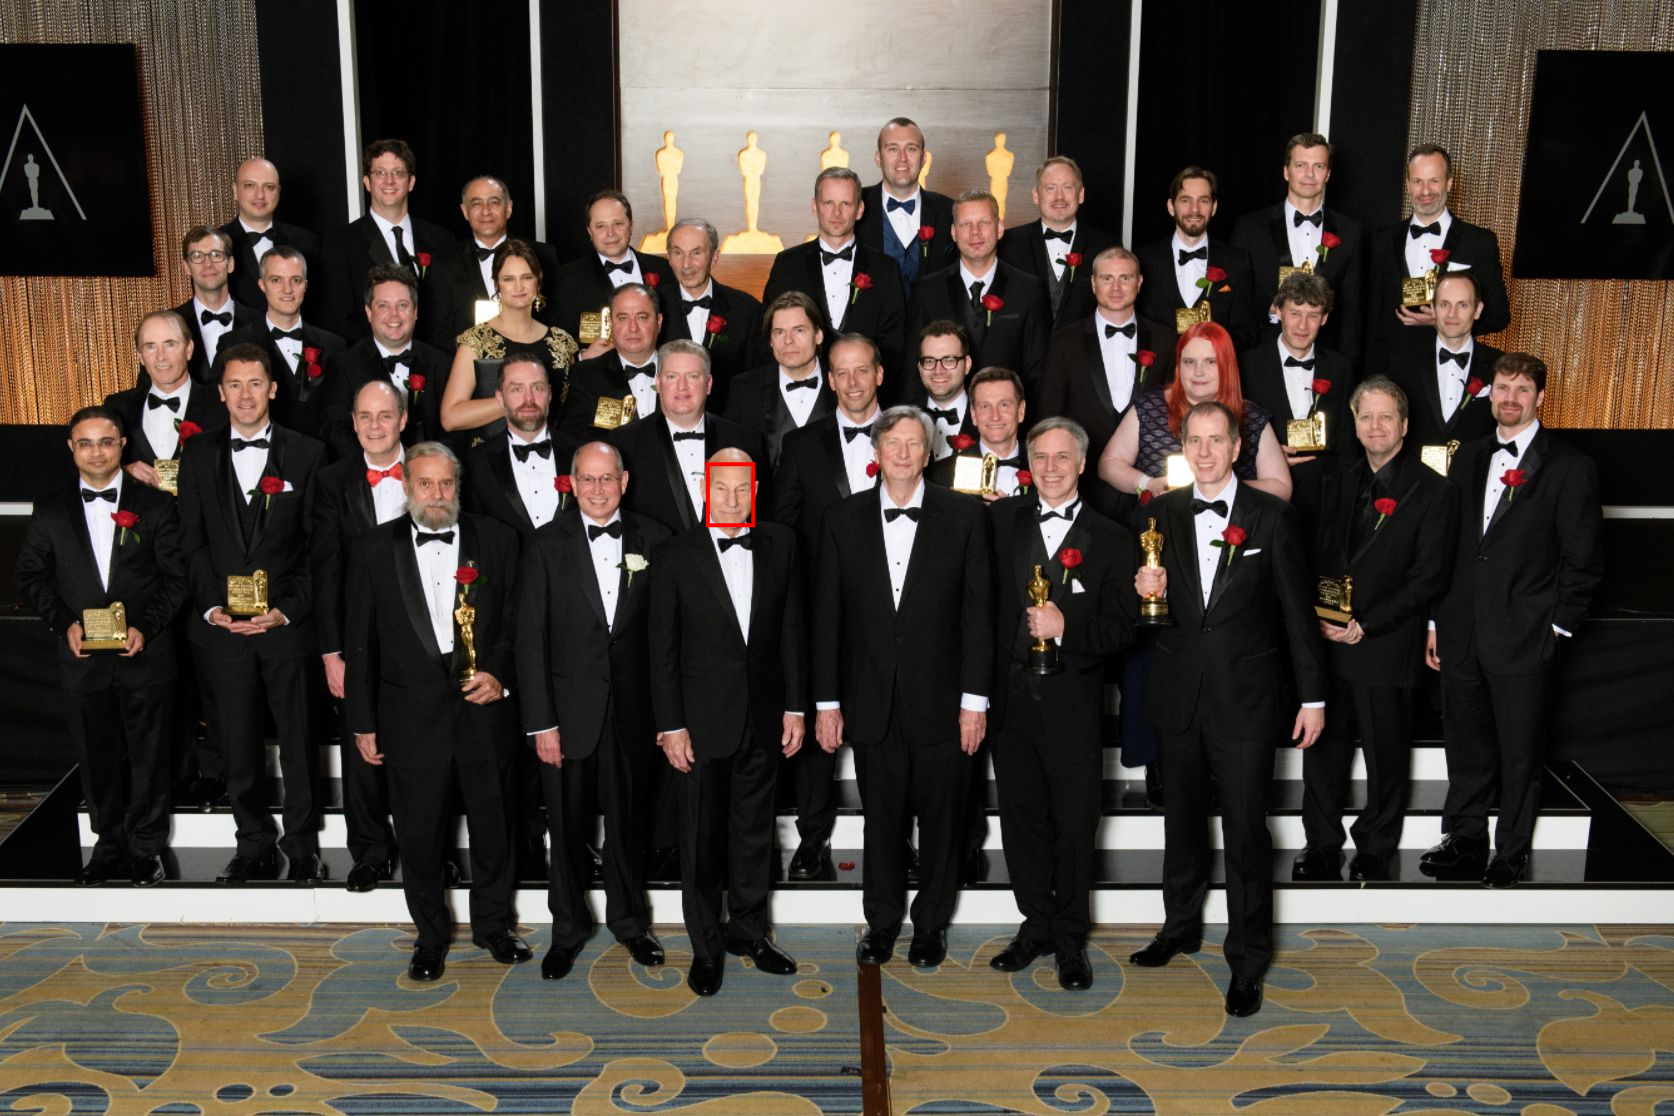

In [4]:
// load the AWS SDK
AWS = require('aws-sdk')
support = require('../support')

// create a Rekogntion object to call
rek = new AWS.Rekognition()

// configure parameters
imageParams = {
  SimilarityThreshold: 90, 
  SourceImage: {
    S3Object: {
      Bucket: process.env.MY_BUCKET_NAME,
      Name: "images/picard.jpg"
    }
  }, 
  TargetImage: {
    S3Object: {
     Bucket: process.env.MY_BUCKET_NAME,
     Name: "images/Sci-Tech-Oscars-group-photo.jpg"
    }
  }
}

rek.compareFaces(imageParams, (err, data) => {
  support.boxImage(data.FaceMatches, '../data/images/Sci-Tech-Oscars-group-photo.jpg', '../data/images/sci-oscars_boxed.png', err => {
    $$.png(require('fs').readFileSync('../data/images/sci-oscars_boxed.png').toString('base64'));
  })
})
$$.clear()

Congratulations! You have completed Step 3. In Step 4 we will look at how we can use other AWS services in conjunction with Rekognition to build a functioning system.